In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")
df = df[df["VisitorType"] != "Other"]
df["OriginalMonth"] = df["Month"]

df["VisitorType"] = df["VisitorType"].map({"New_Visitor": 0, "Returning_Visitor": 1})
df["Weekend"] = df["Weekend"].map({False: 0, True: 1})
df["Revenue"] = df["Revenue"].map({False: 0, True: 1})

/var/folders/06/6w225dnx3tqbs1sqwjdjb7t00000gn/T/ipykernel_67248/3344789070.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["VisitorType_Label", "Revenue_Label"]).size().unstack()


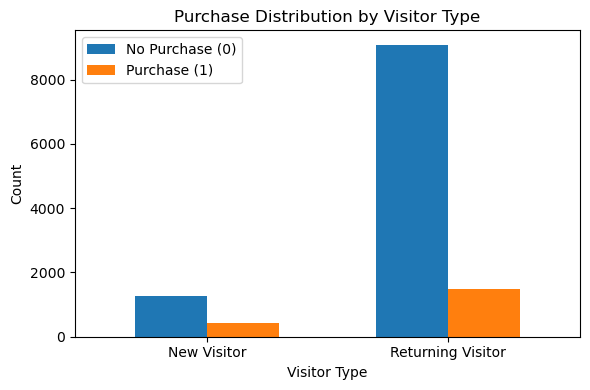

In [3]:
df["VisitorType_Label"] = df["VisitorType"].map({0: "New Visitor", 1: "Returning Visitor"})
df["Revenue_Label"] = df["Revenue"].map({0: "No Purchase (0)", 1: "Purchase (1)"})

df["VisitorType_Label"] = pd.Categorical(
    df["VisitorType_Label"],
    categories=["New Visitor", "Returning Visitor"],
    ordered=True)

grouped = df.groupby(["VisitorType_Label", "Revenue_Label"]).size().unstack()

ax = grouped.plot(kind='bar', figsize=(6, 4), width=0.6)
plt.title("Purchase Distribution by Visitor Type")
plt.xlabel("Visitor Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.savefig("Purchase_Distribution.png", dpi=300)
plt.show()


/var/folders/06/6w225dnx3tqbs1sqwjdjb7t00000gn/T/ipykernel_67248/2014406186.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_new = df[df["VisitorType"] == 0].groupby("OriginalMonth")["Revenue"].mean()
/var/folders/06/6w225dnx3tqbs1sqwjdjb7t00000gn/T/ipykernel_67248/2014406186.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_returning = df[df["VisitorType"] == 1].groupby("OriginalMonth")["Revenue"].mean()


               New Visitors  Returning Visitors
OriginalMonth                                  
Feb                0.000000            0.016393
Mar                0.155172            0.093134
May                0.275862            0.090969
June               0.233333            0.085603
Jul                0.203704            0.145503
Aug                0.291667            0.152355
Sep                0.259259            0.170588
Oct                0.225806            0.204706
Nov                0.305489            0.245991
Dec                0.223881            0.096241


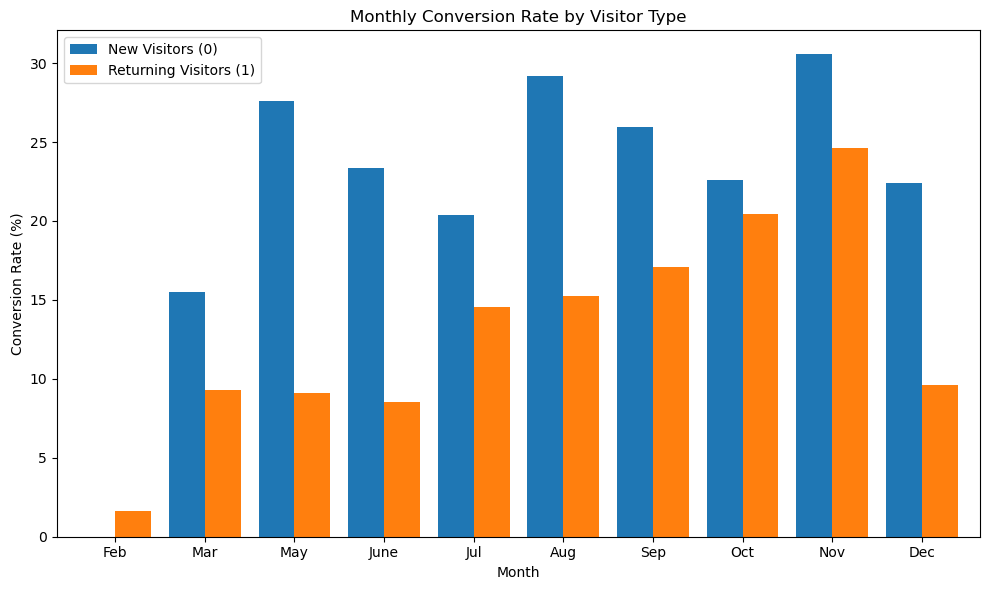

In [4]:
# not every month results in a purchase
actual_months = df["OriginalMonth"].unique().tolist()
actual_months.sort(key=lambda x: 
                   ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'].index(x))
df["OriginalMonth"] = pd.Categorical(df["OriginalMonth"], categories=actual_months, ordered=True)

# calculate the conversion rate
monthly_new = df[df["VisitorType"] == 0].groupby("OriginalMonth")["Revenue"].mean()
monthly_returning = df[df["VisitorType"] == 1].groupby("OriginalMonth")["Revenue"].mean()

monthly_comparison = pd.DataFrame({
    "New Visitors": monthly_new,
    "Returning Visitors": monthly_returning})
print(monthly_comparison)

# bar plot
formatter = FuncFormatter(lambda y, _: int(y * 100))

ax = monthly_comparison.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Monthly Conversion Rate by Visitor Type")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.legend(["New Visitors (0)", "Returning Visitors (1)"])

ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig("monthly_conversion_rate.png", dpi=300)
plt.show()

In [5]:
# transform month into numerical by one-hot encoding
df = pd.get_dummies(df, columns=['Month'], prefix='Month')

                         New Visitors  Returning Visitors
Administrative                 -0.076               0.172
Administrative_Duration        -0.040               0.116
BounceRates                    -0.089              -0.148
Browser                         0.038               0.013
ExitRates                      -0.140              -0.203
Informational                  -0.031               0.123
Informational_Duration          0.003               0.086
Month_Aug                       0.021               0.007
Month_Dec                      -0.029              -0.047
Month_Feb                      -0.014              -0.047
Month_Jul                      -0.019               0.003
Month_June                     -0.005              -0.025
Month_Mar                      -0.087              -0.058
Month_May                       0.030              -0.089
Month_Nov                       0.075               0.174
Month_Oct                      -0.015               0.039
Month_Sep     

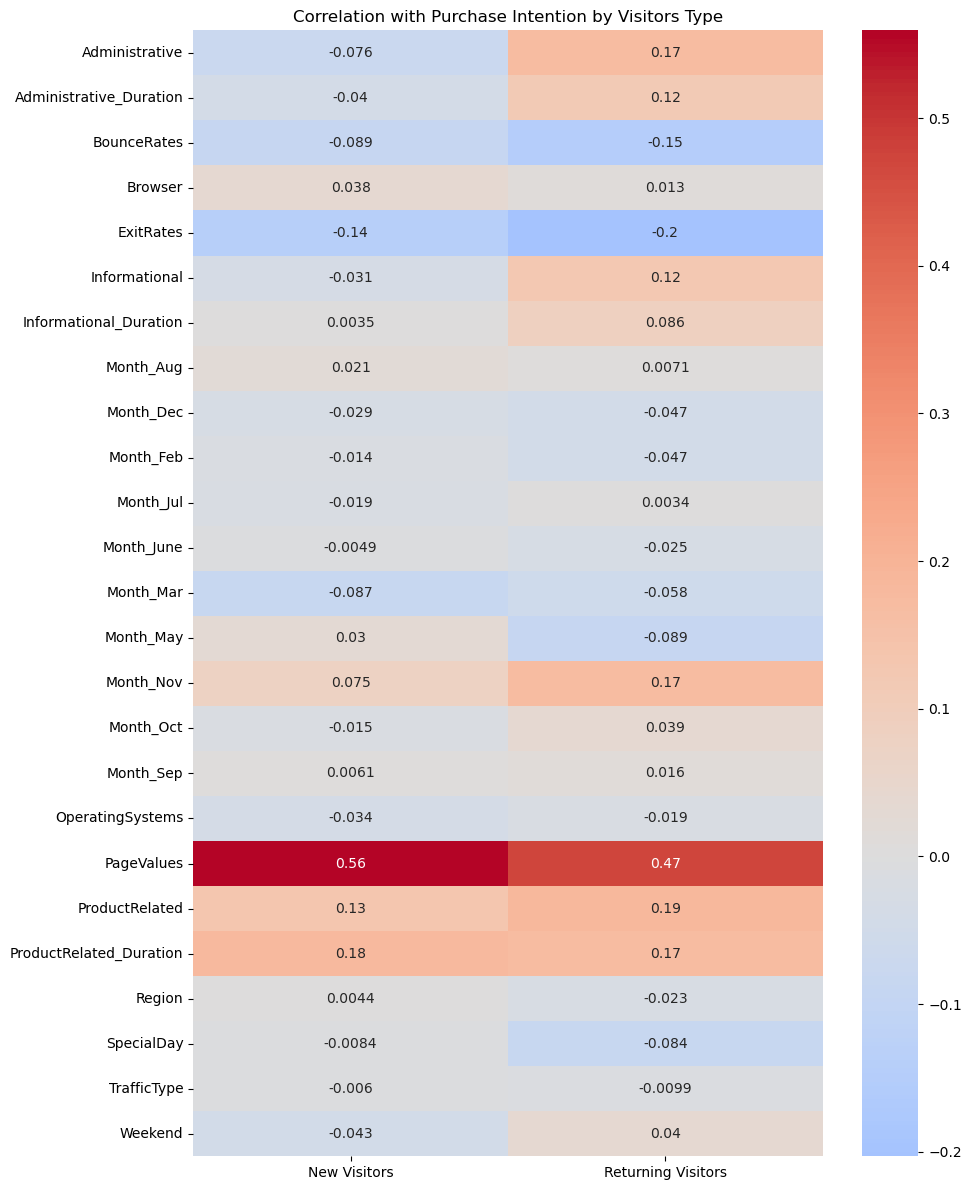

In [10]:
# Correlation
new_visitors_df = df[df["VisitorType"] == 0].drop(columns=["VisitorType", "OriginalMonth"])
new_corr = (
    new_visitors_df
    .select_dtypes(include=["number", "bool"])
    .corr()["Revenue"]
    .drop("Revenue")
    .sort_values(ascending=False))

returning_visitors_df = df[df["VisitorType"] == 1].drop(columns=["VisitorType", "OriginalMonth"])
returning_corr = (
    returning_visitors_df
    .select_dtypes(include=["number", "bool"])
    .corr()["Revenue"]
    .drop("Revenue")
    .sort_values(ascending=False))

correlation_comparison = pd.DataFrame({
    "New Visitors": new_corr,
    "Returning Visitors": returning_corr})


print(correlation_comparison.round(3))


plt.figure(figsize=(10, 12))
sns.heatmap(correlation_comparison, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation with Purchase Intention by Visitors Type")
plt.tight_layout()
plt.savefig("Correlation.png", dpi=300)
plt.show()
